In [136]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [137]:
cereals = pd.read_csv("cereal.csv")
numeric_vars = cereals.drop(['name','mfr','type'],axis=1)
#del numeric_vars.index.name
X=numeric_vars.replace(-1,np.nan)
X.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [138]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
imputed_X = pd.DataFrame(imp_mean.fit_transform(X),columns=X.columns.values)
imputed_X.index = cereals["name"]

In [139]:
imputed_X.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [140]:
imputed_X

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100% Bran,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,3.0,1.0,0.33,68.402973
100% Natural Bran,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,3.0,1.0,1.00,33.983679
All-Bran,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,3.0,1.0,0.33,59.425505
All-Bran with Extra Fiber,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,3.0,1.0,0.50,93.704912
Almond Delight,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,3.0,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.000000,25.0,3.0,1.0,0.75,39.106174
Trix,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.000000,25.0,2.0,1.0,1.00,27.753301
Wheat Chex,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.000000,25.0,1.0,1.0,0.67,49.787445


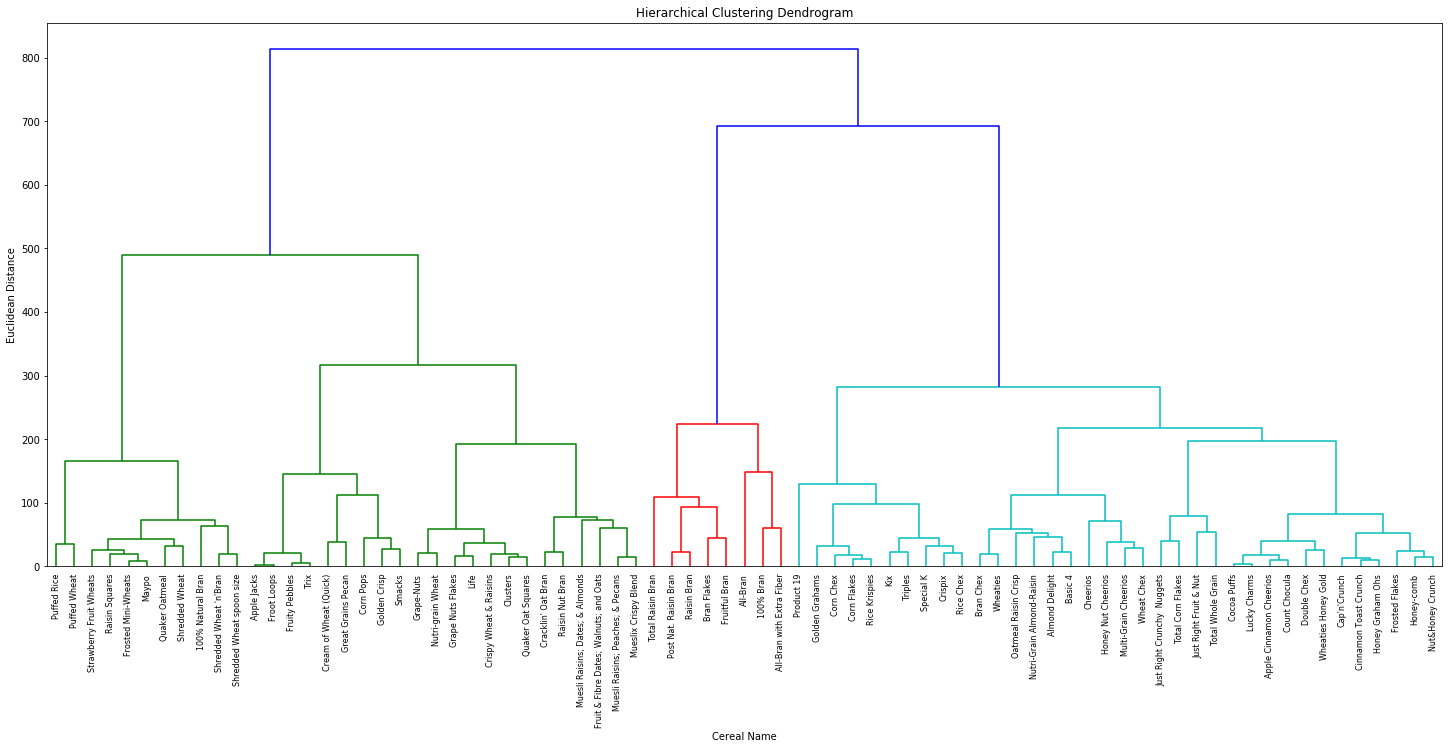

In [141]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(imputed_X, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cereal Name')
plt.ylabel('Euclidean Distance')
sch.dendrogram(Z,leaf_rotation=90.,leaf_font_size=8.,labels = imputed_X.index)
plt.show()

In [142]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
X_standardized=pd.DataFrame(preprocessing.scale(imputed_X))
kmeans_model = KMeans(n_clusters=6, init='k-means++').fit(X_standardized)

In [143]:
y_kmeans=kmeans_model.predict(X_standardized)
#cluster = pd.DataFrame(y_kmeans)
imputed_X['cluster']=y_kmeans
imputed_X['cluster'].value_counts()

0    20
4    18
1    15
5    12
2     9
3     3
Name: cluster, dtype: int64

In [144]:
kmeans_mean_cluster = pd.DataFrame(round(imputed_X.groupby('cluster').mean(),1))
kmeans_mean_cluster

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
cluster,,,,,,,,,,,,,
0,111.5,1.5,1.0,170.0,0.5,12.5,11.6,43.8,25.0,1.7,1.0,0.9,28.3
1,103.3,3.0,1.7,123.7,2.7,13.0,6.4,118.2,21.7,2.7,1.0,0.6,45.3
2,83.3,2.6,0.1,10.6,2.0,16.0,1.7,89.3,8.3,1.9,0.9,0.9,64.0
3,63.3,4.0,0.7,176.7,11.0,6.7,3.7,310.0,25.0,3.0,1.0,0.4,73.8
4,105.0,2.7,0.6,236.1,1.2,19.1,3.2,63.9,41.7,1.9,1.0,1.0,44.9
5,135.0,3.2,1.7,180.4,3.5,15.6,10.9,172.1,37.5,2.9,1.3,0.8,36.2


In [145]:
clstr5=imputed_X.loc[imputed_X['cluster']==5] 
clstr5.sort_values(by='fiber',ascending=False)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cluster
name,,,,,,,,,,,,,,
Post Nat. Raisin Bran,120.0,3.0,1.0,200.0,6.0,11.0,14.0,260.0,25.0,3.0,1.33,0.67,37.840594,5
Fruit & Fibre Dates; Walnuts; and Oats,120.0,3.0,2.0,160.0,5.0,12.0,10.0,200.0,25.0,3.0,1.25,0.67,40.917047,5
Fruitful Bran,120.0,3.0,0.0,240.0,5.0,14.0,12.0,190.0,25.0,3.0,1.33,0.67,41.015492,5
Raisin Bran,120.0,3.0,1.0,210.0,5.0,14.0,12.0,240.0,25.0,2.0,1.33,0.75,39.259197,5
Total Raisin Bran,140.0,3.0,1.0,190.0,4.0,15.0,14.0,230.0,100.0,3.0,1.50,1.00,28.592785,5
Muesli Raisins; Dates; & Almonds,150.0,4.0,3.0,95.0,3.0,16.0,11.0,170.0,25.0,3.0,1.00,1.00,37.136863,5
Muesli Raisins; Peaches; & Pecans,150.0,4.0,3.0,150.0,3.0,16.0,11.0,170.0,25.0,3.0,1.00,1.00,34.139765,5
Mueslix Crispy Blend,160.0,3.0,2.0,150.0,3.0,17.0,13.0,160.0,25.0,3.0,1.50,0.67,30.313351,5
Nutri-Grain Almond-Raisin,140.0,3.0,2.0,220.0,3.0,21.0,7.0,130.0,25.0,3.0,1.33,0.67,40.692320,5


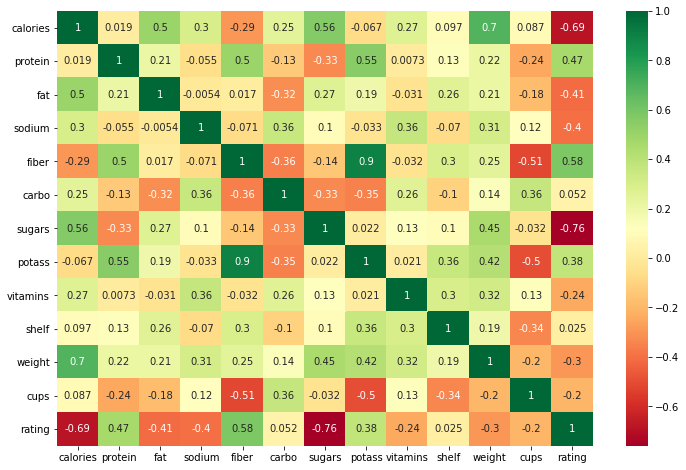

In [146]:
import seaborn as sns 
import matplotlib.pyplot as plt
# generating correlation heatmap 
x=cereals.iloc[:,3:12]
y = cereals.iloc[:,-1]
corrmat = cereals.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
g=sns.heatmap(cereals[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# posting correlation heatmap to output console  
plt.show() 

In [147]:
imputed_X=imputed_X.drop(['cluster'], axis=1)

Text(0, 0.5, 'Inertia')

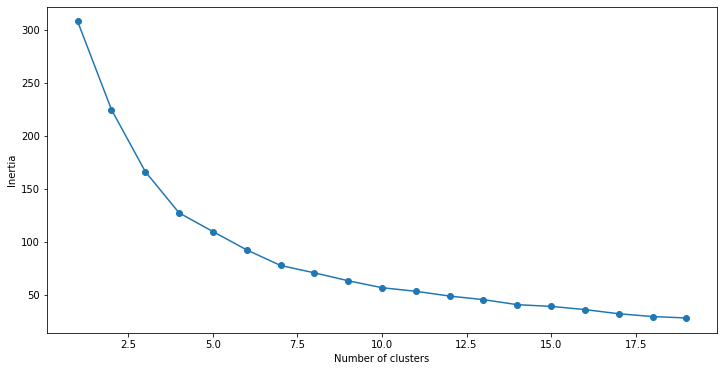

In [175]:
import matplotlib.pyplot as plt
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_standardized)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [179]:
from sklearn import preprocessing
X=cereals[['fiber','sugars','fat','protein']]
X_standardized=X

Text(0, 0.5, 'Inertia')

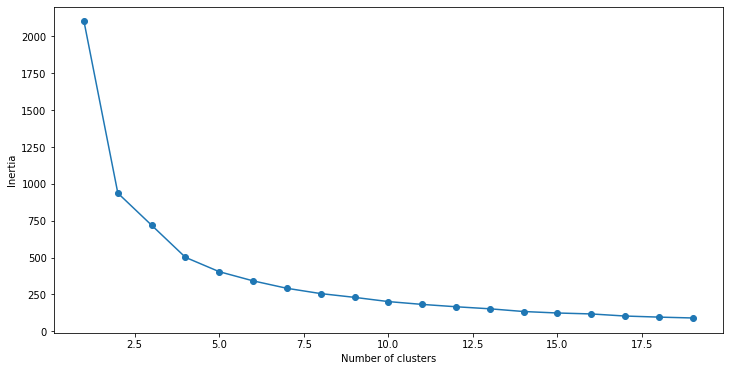

In [180]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_standardized)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [189]:
kmeans_model = KMeans(n_clusters=5, init='k-means++').fit(X_standardized)
y_kmeans=kmeans_model.predict(X_standardized)
imputed_X['cluster']=y_kmeans
imputed_X['cluster'].value_counts()

0    27
4    25
3    14
2     8
1     3
Name: cluster, dtype: int64

In [190]:
kmeans_mean_cluster = pd.DataFrame(round(imputed_X.groupby('cluster').mean(),1))
kmeans_mean_cluster

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
cluster,,,,,,,,,,,,,
0,108.9,2.5,1.4,158.7,2.0,14.2,7.4,99.6,29.6,2.4,1.0,0.7,40.1
1,63.3,4.0,0.7,176.7,11.0,6.7,3.7,310.0,25.0,3.0,1.0,0.4,73.8
2,135.0,3.2,1.6,174.4,4.2,14.4,12.1,202.5,34.4,2.9,1.3,0.8,36.2
3,110.7,1.4,0.8,149.3,0.4,12.1,12.6,37.5,25.0,1.8,1.0,0.9,28.2
4,98.8,2.8,0.6,159.8,1.5,18.1,2.3,73.3,27.0,1.9,1.0,0.9,51.8


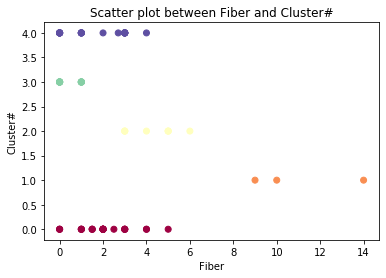

In [191]:
labels = y_kmeans
# Plot the data
plt.scatter(imputed_X['fiber'], imputed_X['cluster'],c=labels,cmap='Spectral')
plt.title('Scatter plot between Fiber and Cluster#')
plt.xlabel('Fiber')
plt.ylabel('Cluster#')
plt.show()

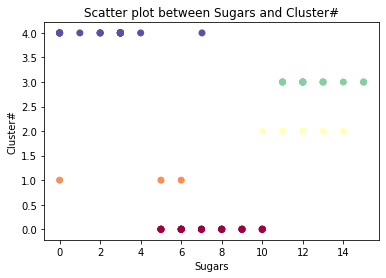

In [192]:
plt.scatter(imputed_X['sugars'], imputed_X['cluster'],c=labels,cmap='Spectral')
plt.title('Scatter plot between Sugars and Cluster#')
plt.xlabel('Sugars')
plt.ylabel('Cluster#')
plt.show()

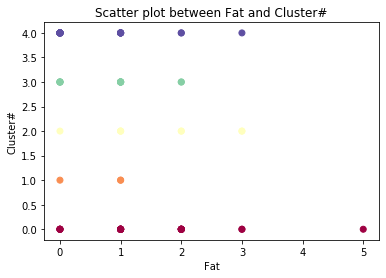

In [193]:
plt.scatter(imputed_X['fat'], imputed_X['cluster'],c=labels,cmap='Spectral')
plt.title('Scatter plot between Fat and Cluster#')
plt.xlabel('Fat')
plt.ylabel('Cluster#')
plt.show()

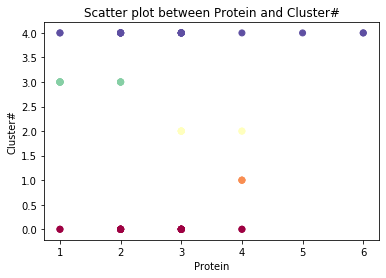

In [194]:
plt.scatter(imputed_X['protein'], imputed_X['cluster'],c=labels,cmap='Spectral')
plt.title('Scatter plot between Protein and Cluster#')
plt.xlabel('Protein')
plt.ylabel('Cluster#')
plt.show()

In [195]:
Healthy=imputed_X.loc[imputed_X['cluster']==1]
Healthy.sort_values(by='fiber',ascending=False)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cluster
name,,,,,,,,,,,,,,
All-Bran with Extra Fiber,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1.0,0.50,93.704912,1
100% Bran,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1.0,0.33,68.402973,1
All-Bran,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505,1


In [196]:
clstr2=imputed_X.loc[imputed_X['cluster']==2]
clstr2.sort_values(by='sugars',ascending=False)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cluster
name,,,,,,,,,,,,,,
Post Nat. Raisin Bran,120.0,3.0,1.0,200.0,6.0,11.0,14.0,260.0,25.0,3.0,1.33,0.67,37.840594,2
Total Raisin Bran,140.0,3.0,1.0,190.0,4.0,15.0,14.0,230.0,100.0,3.0,1.50,1.00,28.592785,2
Mueslix Crispy Blend,160.0,3.0,2.0,150.0,3.0,17.0,13.0,160.0,25.0,3.0,1.50,0.67,30.313351,2
Fruitful Bran,120.0,3.0,0.0,240.0,5.0,14.0,12.0,190.0,25.0,3.0,1.33,0.67,41.015492,2
Raisin Bran,120.0,3.0,1.0,210.0,5.0,14.0,12.0,240.0,25.0,2.0,1.33,0.75,39.259197,2
Muesli Raisins; Dates; & Almonds,150.0,4.0,3.0,95.0,3.0,16.0,11.0,170.0,25.0,3.0,1.00,1.00,37.136863,2
Muesli Raisins; Peaches; & Pecans,150.0,4.0,3.0,150.0,3.0,16.0,11.0,170.0,25.0,3.0,1.00,1.00,34.139765,2
Fruit & Fibre Dates; Walnuts; and Oats,120.0,3.0,2.0,160.0,5.0,12.0,10.0,200.0,25.0,3.0,1.25,0.67,40.917047,2


In [197]:
clstr2=imputed_X.loc[imputed_X['cluster']==3]
clstr2.sort_values(by='sugars',ascending=False)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cluster
name,,,,,,,,,,,,,,
Golden Crisp,100.0,2.0,0.0,45.0,0.0,11.0,15.0,40.0,25.0,1.0,1.0,0.88,35.252444,3
Smacks,110.0,2.0,1.0,70.0,1.0,9.0,15.0,40.0,25.0,2.0,1.0,0.75,31.230054,3
Apple Jacks,110.0,2.0,0.0,125.0,1.0,11.0,14.0,30.0,25.0,2.0,1.0,1.00,33.174094,3
Cocoa Puffs,110.0,1.0,1.0,180.0,0.0,12.0,13.0,55.0,25.0,2.0,1.0,1.00,22.736446,3
Count Chocula,110.0,1.0,1.0,180.0,0.0,12.0,13.0,65.0,25.0,2.0,1.0,1.00,22.396513,3
Froot Loops,110.0,2.0,1.0,125.0,1.0,11.0,13.0,30.0,25.0,2.0,1.0,1.00,32.207582,3
Cap'n'Crunch,120.0,1.0,2.0,220.0,0.0,12.0,12.0,35.0,25.0,2.0,1.0,0.75,18.042851,3
Corn Pops,110.0,1.0,0.0,90.0,1.0,13.0,12.0,20.0,25.0,2.0,1.0,1.00,35.782791,3
Fruity Pebbles,110.0,1.0,1.0,135.0,0.0,13.0,12.0,25.0,25.0,2.0,1.0,0.75,28.025765,3
